In [120]:
import pandas as pd
from Orange.evaluation import graph_ranks
import matplotlib.pyplot as plt
from matplotlib import rc

In [121]:
meas = 'ACC'
gamma1, gamma2 = '20.0', '5.0'

In [122]:
table = pd.read_csv('csv/' + '_'.join([meas.lower(), gamma1, gamma2]) + '.csv', index_col = False)
table.head()

,alpha0.0(acc),alpha0.3(acc),alpha0.7(acc),alpha1.0(acc),mv(acc),rf(acc)
0,0.715,0.722,0.726,0.692,0.720,0.724
1,0.658,0.497,0.528,0.582,0.568,0.546
2,0.742,0.761,0.769,0.758,0.716,0.840
3,0.915,0.907,0.907,0.921,0.912,0.919
4,0.717,0.691,0.725,0.742,0.707,0.746


In [123]:
ref = ['MV', 'RF']
alg = ['0.0', '0.3', '0.7', '1.0']
rows = alg + ref
generate_latex = ['$\Psi_{' + a + '}$' for a in alg] + ['$\Psi_{' + r.lower() + '}$' for r in ref]

In [124]:
table.shape

(11, 6)

In [125]:
ranks = table.transpose().round(3).rank(ascending = False)
mean_ranks = ranks.mean(axis = 1)
mean_ranks

alpha0.0(acc)    2.727273
alpha0.3(acc)    3.681818
alpha0.7(acc)    3.681818
alpha1.0(acc)    4.090909
mv(acc)          4.227273
rf(acc)          2.590909
dtype: float64

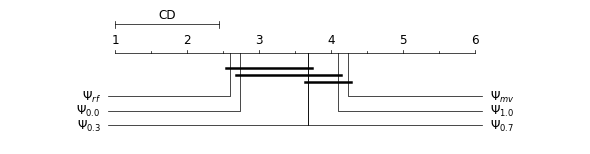

In [126]:
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'size': 12})
# rc('font',**{'family':'serif','serif':['Palatino']})
fig = graph_ranks(mean_ranks.array, generate_latex, 1.44, textspace = 1.5, width = 8, filename=('_'.join([meas, str(int(float(gamma1))), str(int(float(gamma2)))]) + '.png'))